# todo
- https://github.com/Belval/pdf2image (1.5k stars)
- https://github.com/timClicks/slate (425 stars)        
- https://github.com/camelot-dev/camelot (2.8k stars)
    - [66.如何使用Python提取PDF表格中数据](https://cloud.tencent.com/developer/article/1584601?from=15425)
- https://github.com/eiceblue/Spire.PDF-for-Python (6 stars)
    - [Python是如何实现PDF文本与图片的提取的？](https://cloud.tencent.com/developer/article/2356820?from=15425) spire.pdf
- [全面指南———用python提取PDF中各类文本内容的方法](https://www.luxiangdong.com/2023/10/05/extract/) PyPDF2, Pdfminer, Pdfplumber, Pdf2image
- [Python PyPDF2、pdfplumber 提取 PDF 文本、图片内容](https://cloud.tencent.com/developer/article/2102074?from=15425) PyPDF2, pdfplumber
- [手把手教你如何用Python从PDF文件中导出数据（附链接）](https://www.jiqizhixin.com/articles/2018-11-28-9) pdfminer, slate
- [X] [从PDF和图像中提取文本，以供大型语言模型使用](https://blog.csdn.net/weixin_38739735/article/details/134636221) pypdfium2, pytesseract, easyOCR, PyPDF2, LangChain
- [X] [如何使用语言模型从PDF和图像中提取文本](https://fuxi.163.com/database/987) PyPDF2, pytesseract
- [X] [Python | PDF 提取文本的几种方法](https://cloud.tencent.com/developer/article/1825553) PyPDF2, pdfminer, textract, pytesseract
- [X] [Python--从PDF中提取文本的方法总结](https://blog.csdn.net/Achernar0208/article/details/129199937) pdfplumber, pdfminer, pymupdf

In [ ]:
# https://blog.aspose.com/zh/pdf/extract-text-from-pdf-in-python/
# !pip install aspose-pdf
import aspose.pdf as ap
document = ap.Document("input.pdf")
textDevice = ap.devices.TextDevice()
textDevice.process(document.pages[1], "extracted_text.txt")

In [9]:
pdf_path = "/home/qj00182/Downloads/Language-conditioned Learning for Robotic Manipulation_A Survey.pdf"

# [pypdf](https://github.com/py-pdf/pypdf)
todo: [Extract Text from a PDF](https://pypdf.readthedocs.io/en/stable/user/extract-text.html)  
`pip install pypdf`


In [34]:
from pypdf import PdfReader

reader = PdfReader(pdf_path)
number_of_pages = len(reader.pages)
page = reader.pages[0]
text = page.extract_text()
print(text)

1
Language-conditioned Learning for Robotic
Manipulation: A Survey
Hongkuan Zhou1,2∗, Xiangtong Yao1∗, Yuan Meng1∗, Siming Sun1, Zhenshan Bing1†, Kai Huang3, Alois Knoll1
1Technical University of Munich, Munich, Germany
2Corporate Research, Robert Bosch GmbH, Renningen, Germany
3Sun Yat-sen University, Guang Zhou, China
Abstract —Language-conditioned robotic manipulation represents
a cutting-edge area of research, enabling seamless communication
and cooperation between humans and robotic agents. This
field focuses on teaching robotic systems to comprehend and
execute instructions conveyed in natural language. To achieve
this, the development of robust language understanding models
capable of extracting actionable insights from textual input
is essential. In this comprehensive survey, we systematically
explore recent advancements in language-conditioned approaches
within the context of robotic manipulation. We analyze these
approaches based on their learning paradigms, which encompass
r

In [11]:
# todo
count = 0
for image_file_object in page.images:
    print(image_file_object)
#     with open(str(count) + image_file_object.name, "wb") as fp:
#         fp.write(image_file_object.data)
#         count += 1

ImageFile(name=Im1.png, data: 20.3 kB)


# [PyMuPDF](https://github.com/pymupdf/PyMuPDF)
`pip install PyMuPDF`

In [52]:
import pymupdf

with pymupdf.open(pdf_path) as pdf: # open a pdf
    for page in pdf:                # iterate the document pages
        text = page.get_text()      # get plain text encoded as UTF-8
        print(text)
        break

# doc = pymupdf.open(pdf_path) # open a document
# for page in doc:             # iterate the document pages
#     text = page.get_text()   # get plain text encoded as UTF-8
#     print(text)
#     break

1
Language-conditioned Learning for Robotic
Manipulation: A Survey
Hongkuan Zhou1,2∗, Xiangtong Yao1∗, Yuan Meng1∗, Siming Sun1, Zhenshan Bing1†, Kai Huang3, Alois Knoll1
1Technical University of Munich, Munich, Germany
2Corporate Research, Robert Bosch GmbH, Renningen, Germany
3Sun Yat-sen University, Guang Zhou, China
Abstract—Language-conditioned robotic manipulation represents
a cutting-edge area of research, enabling seamless communication
and cooperation between humans and robotic agents. This
field focuses on teaching robotic systems to comprehend and
execute instructions conveyed in natural language. To achieve
this, the development of robust language understanding models
capable of extracting actionable insights from textual input
is essential. In this comprehensive survey, we systematically
explore recent advancements in language-conditioned approaches
within the context of robotic manipulation. We analyze these
approaches based on their learning paradigms, which encompass
re

# [pdfminer.six](https://github.com/pdfminer/pdfminer.six)
`pip install pdfminer.six`

| lib | 缺点 | 注释
| :- | :- | :-
| pdfminer.six | 段内文本出现跳变
| pdfplumber | 只能从左到右读取, 无法处理两栏 | based on pdfminer.six
| textract | 左栏从下到上, 右栏从上到下 | based on pdfminer.six

In [44]:
from pdfminer.high_level import extract_text

text = extract_text(pdf_path)
print(text)

1

Language-conditioned Learning for Robotic
Manipulation: A Survey

Hongkuan Zhou1,2∗, Xiangtong Yao1∗, Yuan Meng1∗, Siming Sun1, Zhenshan Bing1†, Kai Huang3, Alois Knoll1

1Technical University of Munich, Munich, Germany
2Corporate Research, Robert Bosch GmbH, Renningen, Germany
3Sun Yat-sen University, Guang Zhou, China

4
2
0
2

b
e
F
3

]

O
R
.
s
c
[

2
v
7
0
8
0
1
.
2
1
3
2
:
v
i
X
r
a

Abstract—Language-conditioned robotic manipulation represents
a cutting-edge area of research, enabling seamless communication
and cooperation between humans and robotic agents. This
field focuses on teaching robotic systems to comprehend and
execute instructions conveyed in natural language. To achieve
this, the development of robust language understanding models
capable of extracting actionable insights from textual
input
is essential. In this comprehensive survey, we systematically
explore recent advancements in language-conditioned approaches
within the context of robotic manipulation. We ana

## [pdfplumber](https://github.com/jsvine/pdfplumber)
`pip install pdfplumber`

todo:
- [从PDF中提取表格和文本](https://zhuanlan.zhihu.com/p/163764713)
- [Python提取PDF文件中的表格文本保存为Excel文件](https://cloud.tencent.com/developer/article/1778806?from=15425)
- [如何使用python提取pdf表格及文本，并保存到excel](https://cloud.tencent.com/developer/article/1972029?from=15425)
- [如何使用Python提取PDF表格及文本，并保存到Excel](https://cloud.tencent.com/developer/article/1815296?from=15425) 同上

In [51]:
import pdfplumber

with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[0]
    text = page.extract_text()
    print(text)

1
Language-conditioned Learning for Robotic
Manipulation: A Survey
Hongkuan Zhou1,2∗, Xiangtong Yao1∗, Yuan Meng1∗, Siming Sun1, Zhenshan Bing1†, Kai Huang3, Alois Knoll1
1Technical University of Munich, Munich, Germany
2Corporate Research, Robert Bosch GmbH, Renningen, Germany
3Sun Yat-sen University, Guang Zhou, China
Abstract—Language-conditionedroboticmanipulationrepresents
a anc dutt cin og o- pe ed rg ae tia or nea bo ef twre es ee narc hh u, men aa nb slin ag ndsea rm oble os ts iccom agm enu tn si .ca Tti ho in
s C
ontext-awareServiceRobot
field focuses on teaching robotic systems to comprehend and
execute instructions conveyed in natural language. To achieve
Scene Understanding
this, the development of robust language understanding models E
c isap ea sb sele ntio af l.e Ix ntra tc ht ii sng coa mct pi ro en ha eb nl se ivi ens si ugh rvts ey,fro wm
e
st ye sx tt eu mal ati in cap lu lyt
mation ComputerVision m
b o
di
e
o d
explorerecentadvancementsinlanguage-conditionedapproac

## [textract](https://github.com/deanmalmgren/textract)
`pip install textract`

In [45]:
import textract

text = textract.process(pdf_path)
print(text.decode())

1

Language-conditioned Learning for Robotic
Manipulation: A Survey
Hongkuan Zhou1,2∗ , Xiangtong Yao1∗ , Yuan Meng1∗ , Siming Sun1 , Zhenshan Bing1† , Kai Huang3 , Alois Knoll1
1 Technical

University of Munich, Munich, Germany
Research, Robert Bosch GmbH, Renningen, Germany
3 Sun Yat-sen University, Guang Zhou, China

ction
I Intera
dA
die
bo
Em

In the ever-evolving landscape of robotics and artificial intelligence, a profound transformation is underway—one that
promises to bridge the gap between machines and humanity,
enabling seamless interaction between humans and robots.
At the heart of this transformation lies the concept of
language-conditioned robot manipulation. This groundbreaking paradigm shift heralds a future where robots are no
longer confined to the factory floor or research laboratories
but are seamlessly integrated into our daily lives, becoming
indispensable companions and collaborators. To achieve this
ultimate goal of robotics, integrating robot manipulation and
n

# [pypdfium2](https://github.com/pypdfium2-team/pypdfium2)
`python -m pip install -U pypdfium2`

In [12]:
import pypdfium2 as pdfium
pdf = pdfium.PdfDocument(pdf_path)
page = pdf[0]  # load a page

version = pdf.get_version()  # get the PDF standard version
n_pages = len(pdf)  # get the number of pages in the document
# Get page dimensions in PDF canvas units (1pt->1/72in by default)
width, height = page.get_size()

In [13]:
version, n_pages, width, height

(15, 25, 612.0, 792.0)

In [14]:
def convert_pdf_to_images(file_path, scale=300/72):
   
   pdf_file = pdfium.PdfDocument(file_path)
   
   page_indices = [i for i in range(len(pdf_file))]
   
   renderer = pdf_file.render(
       pdfium.PdfBitmap.to_pil,
       page_indices = page_indices, 
       scale = scale,
   )
   
   final_images = [] 
   
   for i, image in zip(page_indices, renderer):
       
       image_byte_array = BytesIO()
       image.save(image_byte_array, format='jpeg', optimize=True)
       image_byte_array = image_byte_array.getvalue()
       final_images.append(dict({i:image_byte_array}))
   
   return final_images

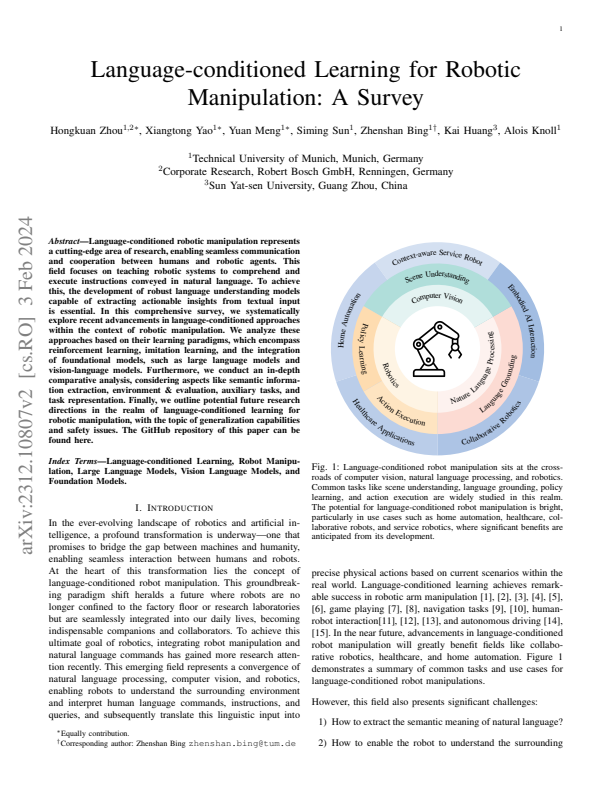

In [15]:
# Render the page
bitmap = page.render(
    scale = 1,    # 72dpi resolution
    rotation = 0, # no additional rotation
    # ... further rendering options
)
pil_image = bitmap.to_pil()
pil_image

In [16]:
pil_image.save("/home/qj00182/Downloads/test.jpg")

In [17]:
# Load a text page helper
textpage = page.get_textpage()

# Extract text from the whole page
text_all = textpage.get_text_range()
print(text_all)

1
Language-conditioned Learning for Robotic
Manipulation: A Survey
Hongkuan Zhou1,2∗, Xiangtong Yao1∗, Yuan Meng1∗, Siming Sun1, Zhenshan Bing1†, Kai Huang3, Alois Knoll1
1Technical University of Munich, Munich, Germany
2Corporate Research, Robert Bosch GmbH, Renningen, Germany
3Sun Yat-sen University, Guang Zhou, China
Abstract—Language-conditioned robotic manipulation represents
a cutting-edge area of research, enabling seamless communication
and cooperation between humans and robotic agents. This
field focuses on teaching robotic systems to comprehend and
execute instructions conveyed in natural language. To achieve
this, the development of robust language understanding models
capable of extracting actionable insights from textual input
is essential. In this comprehensive survey, we systematically
explore recent advancements in language-conditioned approaches
within the context of robotic manipulation. We analyze these
approaches based on their learning paradigms, which encompass
re

/home/qj00182/miniconda3/envs/pdf/lib/python3.12/site-packages/pypdfium2/_helpers/textpage.py:80: UserWarning: get_text_range() call with default params will be implicitly redirected to get_text_bounded()
  warnings.warn("get_text_range() call with default params will be implicitly redirected to get_text_bounded()")


# 光学字符识别 (OCR)

## [pytesseract](https://github.com/madmaze/pytesseract)
- `sudo apt install tesseract-ocr` # refer to: https://tesseract-ocr.github.io/tessdoc/Installation.html
- ~`sudo apt install libtesseract-dev`~
- `conda install -c conda-forge pytesseract`

In [18]:
from PIL import Image
import pytesseract

In [31]:
# 当前支持的所有语言
pytesseract.get_languages(config='')

['eng', 'osd']

In [28]:
# raw_text = pytesseract.image_to_string(pil_image)
raw_text = pytesseract.image_to_string("/home/qj00182/Downloads/test.jpg", lang="eng")
print(raw_text)

arXiv:2312.10807v2 [cs.RO] 3 Feb 2024

Language-conditioned Learning for Robotic
Manipulation: A Survey

Hongkuan Zhou'#*, Xiangtong Yoo, Yuan Meng, Siing Sun', Zhenshan Bing", Kat Huang, Alois Kool!

‘Technical University of Munich, Munich, Germany
2Corporate Research, Robert Bosch GmbH, Renningen, Germany
Sun Yat-sen Univesity, Guang Zhou, China

Abract—Language condition matic maniplationeeprets
2 linge are of eocarch enabling seamlos ommnicaton
Sed cooperation tctreen eet sad route yeaa Ths
it fot en tectlag cote seat to ceupecead ac

1. twrropuerion
Inthe ever-evolving landscape of robotics and aril i
teligence 4 profound transformation is underea}—one th
promises to Inidge the gap betveen machines and humanity,
Snubling seamless interaction between humans and robot.
‘At the Beart of thi transformation lies the concept of
Janguage-conioned robot manipulation. This groundbeak-
ing paradigm shift heralds a furwe where robot ae 90
Jogger confined to the factor loo or research laborat

## [EasyOCR](https://github.com/JaidedAI/EasyOCR)
`pip install easyocr`

In [2]:
import easyocr
reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory
raw_text = reader.readtext("/home/qj00182/Downloads/test.jpg")
raw_text = " ".join([res[1] for res in raw_text])
print(raw_text)

Language-conditioned Learning for Robotic Manipulation: Survey Hongkuan Zhou Xingtong Yio" YuJn Siming Sun" Zhenshan Bing Alois Knoll" Technical University Munich_ Munich Gemunn Rereunh. Robent Bosch GimbH Renningen LUcrmany "Sun Yat-sen Unversity . Giuang Zhou. China 3 LartNici Linquige-conditianed mobalic nunipulatiun nprexents 4cullil:-Fure arei ul naeunk enublma*mIE * communiculiun cuuperi nchueen HnNZ uanbc AuenL_ lcuan Meacting rubuit *alen cumprehenl 2 Eicua antmcmint MauTA Menuaan achlen dei elupuient TInulAEANeiale andertanning MJlke cpubll ExrcLin" Hclmimantn ntinnl ecAum  Ecenls cumprhenae Ane_ Mlemalicll explon ntrenl udtincentnb Enruxrr cundiliuna d unprujchi 2 "ithin the conlett ruholic manipulutiun_ #DMe ippruuche: haxd Iheir leumin' puruirmx #hich encunpus neuuncemnent LCiTuii_ imtuliun leumin? Hdlhe inicrruliun  [ounhliunul modch hune Lunguure mnudek 8 rbion-Hn"uuse medcl Furtbrnore cunduci in-deplh comiuurulite analai cuntilerim iptl Eike Amunlit inlurnu: eLrcliun ent